# **BigBasket(quick commerce business) Analysis**

---



# **1. Business Context**


*   BigBasket is a major online grocery delivery service in India, offering a variety of products,household essentials, personal care items,  and including food.
*    Objective of this analysis is to leverage data science techniques to gain actionable insights that can enhance pricing models, improve brand performance, and optimize product offerings.



---



# **2. About Dataset**
Dataset source: Kaggle(https://www.kaggle.com/datasets/surajjha101/bigbasket-entire-product-list-28k-datapoints?resource=download)
This dataset provides detailed information, including:
- Product names, categories, and subcategories
- Brand details
- Market and sale prices
- Customer ratings
- Product descriptions


---



# **3. Data Exploration**

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sbn
import plotly.express as px



---



**Data is loaded**

In [2]:
dataframe = pd.read_csv("BigBasket Products.csv")



---



**Displaying dataset information**

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB




---



**Checking for duplicate products and missing values**

In [4]:
duplicates = dataframe.duplicated(subset=['product', 'brand']).sum()
print(f"Number of duplicate product-brand entries: {duplicates}")

missing_values = dataframe.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Number of duplicate product-brand entries: 2939
Missing Values in Each Column:
 index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64




---



**Data Quality Issues & Metadata Observations**
1. **Missing Values:**
   - `product` and `brand` columns have some missing values, which could impact analysis.
   - `rating` has a significant number of missing values, which may introduce bias in brand/category ratings.
   - `description` is missing for some products, affecting textual insights.

2. **Duplicate Entries:**
   - A check for duplicate product names and brands should be performed to maintain data integrity.

3. **Outliers in Pricing:**
   - `market_price` and `sale_price` contain extreme values, indicating potential pricing errors or luxury items.

4. **Most Interesting Metadata:**
   - `discount_percentage`: A calculated field showing price reductions.
   - `rating`: Useful for customer satisfaction analysis.
   - `category` and `sub_category`: Help in segmentation analysis.


---



# **4. Data Preprocessing**

**Handling missing values**

In [ ]:
dataframe['rating'].fillna(dataframe['rating'].mean(), inplace=True)
dataframe.dropna(subset=['product', 'brand'], inplace=True)



---



**Feature Engineering: Calculating Discount Percentage**

In [6]:
dataframe['discount_percentage'] = ((dataframe['market_price'] - dataframe['sale_price']) / dataframe['market_price']) * 100



---



# **5. Business Questions & Analysis**

1.   Which product categories receive the highest average discounts?
2.   What is the market share of different product categories?
3. Which product categories have the highest-rated products on average?
4. Is there a correlation between product price and customer rating?
5. How does the discount percentage vary across different categories?
6. Which brands offer the highest discounts on average?
7. What are the Correlation Between Features (Price, Rating, Discount, etc.)?


---



**5.1** **Which product categories receive the highest average discounts?**

**Insight:** Helps in identifying which categories receive the highest promotional discounts.

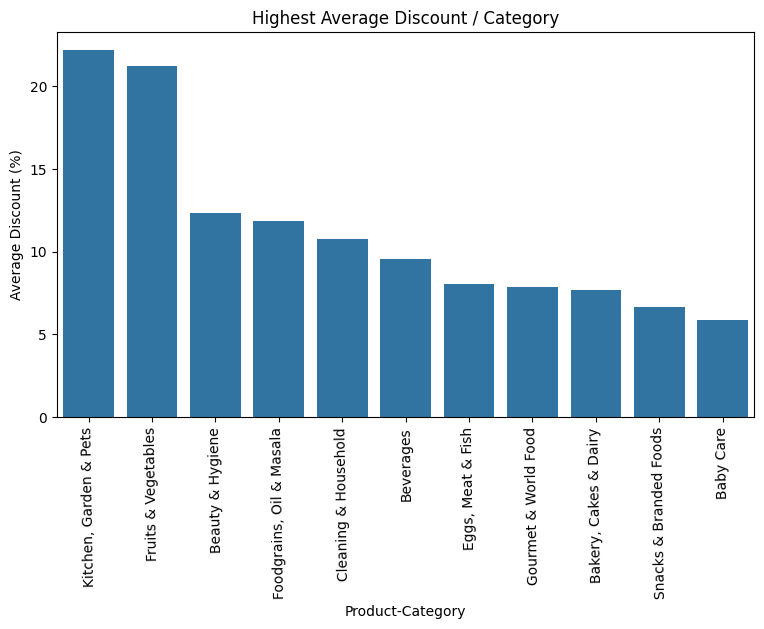

In [7]:
avg_discount = dataframe.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
plot.figure(figsize=(9, 5))
sbn.barplot(x=avg_discount.index, y=avg_discount.values)
plot.xticks(rotation=91)
plot.xlabel("Product-Category")
plot.ylabel("Average Discount (%)")
plot.title("Highest Average Discount / Category")
plot.show()



---



**5.2 What is the market share of different product categories?**

**Insight:**
*   Show the proportion of products belonging to each category.
*   Helps understand which categories dominate the product catalog.



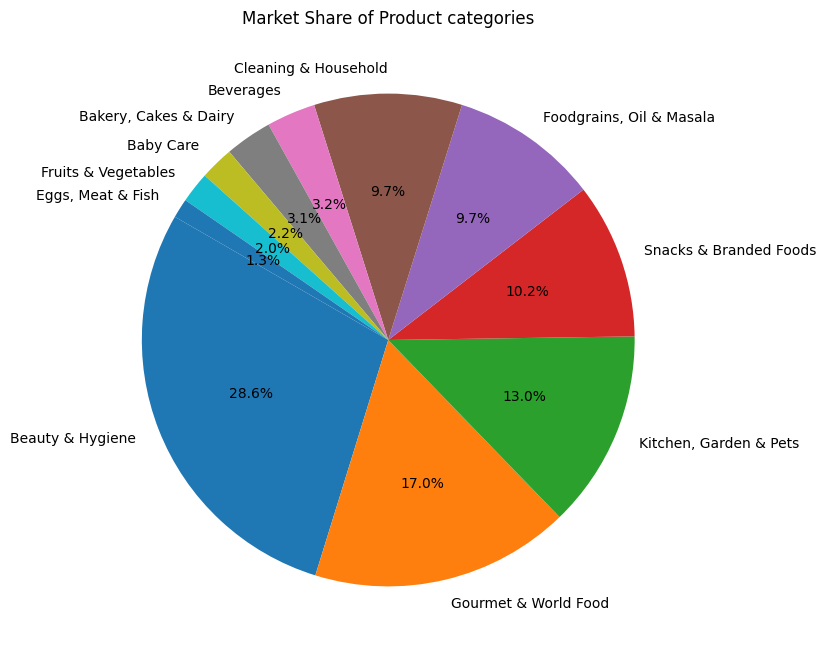

In [8]:
category_counts = dataframe['category'].value_counts()
plot.figure(figsize=(12, 8))
plot.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=150)
plot.title("Market Share of Product categories")
plot.show()




---



**5.3 Which product categories have the highest-rated products on average?**

**Insight:** Identifies top-performing product categories in terms of customer satisfaction.

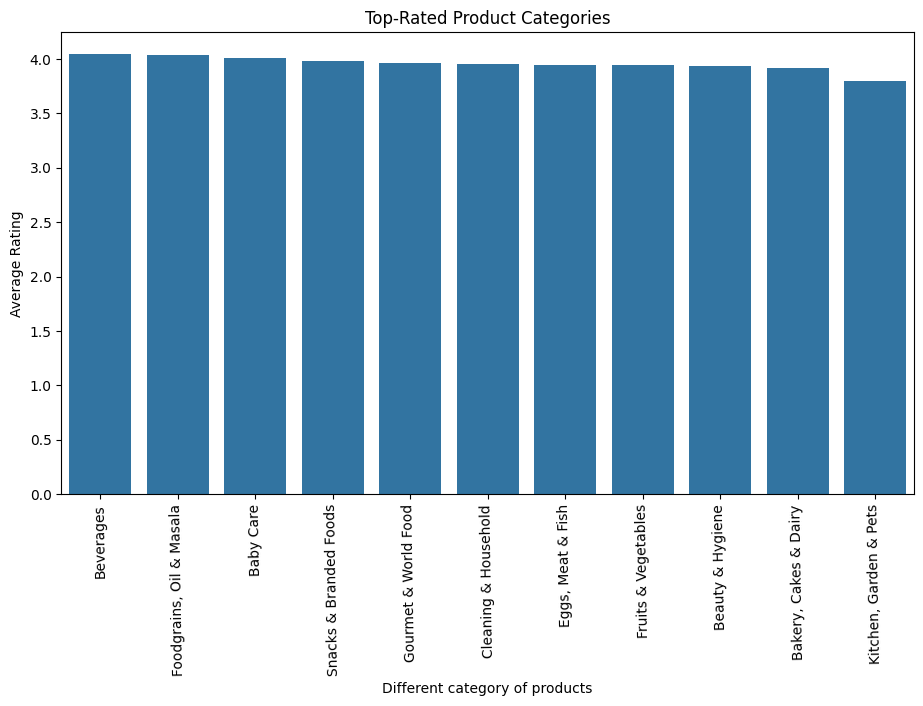

In [9]:
category_ratings = dataframe.groupby('category')['rating'].mean().sort_values(ascending=False)
plot.figure(figsize=(11, 6))
sbn.barplot(x=category_ratings.index, y=category_ratings.values)
plot.xticks(rotation=91)
plot.xlabel("Different category of products")
plot.ylabel("Average Rating")
plot.title("Top-Rated Product Categories")
plot.show()



---



**5.4 Is there a correlation between product price and customer rating?**

**Insight:** Determines whether expensive products tend to have better ratings.

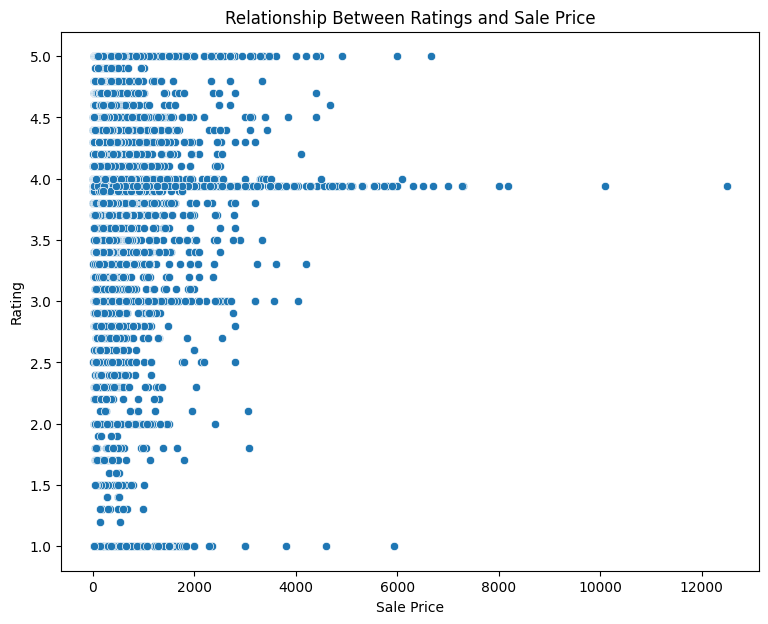

In [10]:
plot.figure(figsize=(9, 7))
sbn.scatterplot(x=dataframe['sale_price'], y=dataframe['rating'])
plot.xlabel("Sale Price")
plot.ylabel("Rating")
plot.title("Relationship Between Ratings and Sale Price")
plot.show()



---



**5.5 How does the discount percentage vary across different categories?**

**Insight:**

*   Shows how discounts are spread across different product categories.
*   Helps analyze discount strategies across different product types.



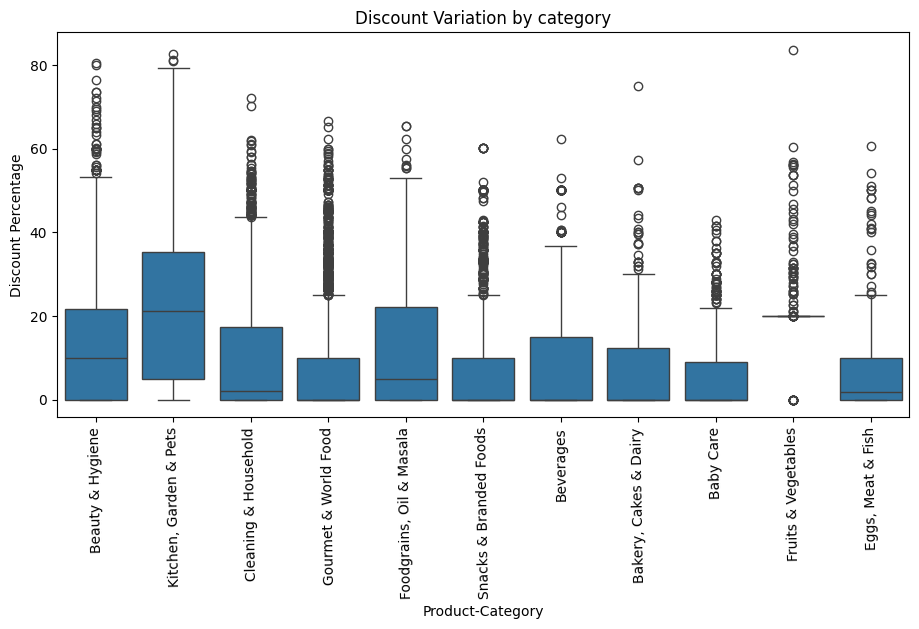

In [11]:
plot.figure(figsize=(11, 5))
sbn.boxplot(x=dataframe['category'], y=dataframe['discount_percentage'])
plot.xticks(rotation=91)
plot.xlabel("Product-Category")
plot.ylabel("Discount Percentage")
plot.title("Discount Variation by category")
plot.show()



---



**5.6 Which brands offer the highest discounts on average?**

 **Insight:**

*   Identifies top-discounting brands for promotional strategies.
*   Helps identify aggressive pricing strategies.





In [12]:
top_discounted_brands = dataframe.groupby('brand')['discount_percentage'].mean().sort_values(ascending=False).head(10)
print("Top 10 Brands with Highest Average Discounts:")
print(top_discounted_brands)

Top 10 Brands with Highest Average Discounts:
brand
Mud             80.000000
Jensons         74.253281
Mansaa          71.250764
Triones         69.766040
Mondsub         69.000000
Spartan         67.067067
Lexton          67.026262
Bertolli        66.689897
HealthChoice    66.688896
Care 4 All      65.101403
Name: discount_percentage, dtype: float64




---



**5.7 What are the Correlation Between Features (Price, Rating, Discount, etc.)?**

**Insight:**

*   This correlation shows how different numerical features (sale price, market price, discount percentage, and rating) are related to each other.
*   Uncovers relationships between key product attributes for strategic decision-making



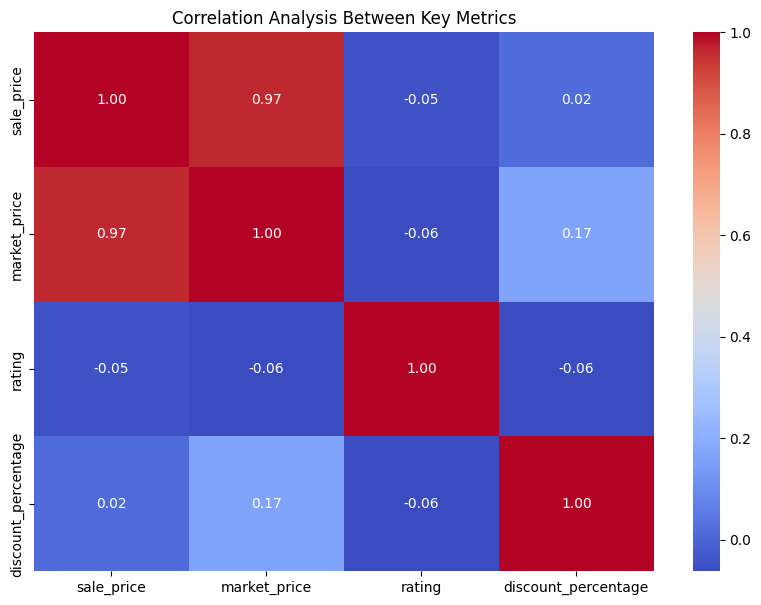

In [13]:
plot.figure(figsize=(10, 7))
corr_matrix = dataframe[['sale_price', 'market_price','rating', 'discount_percentage']].corr()
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plot.title("Correlation Analysis Between Key Metrics")
plot.show()



---



# **6. Conclusion & Recommendations**

**Key Takeaways:**
1. Discount-heavy categories may drive sales but impact profit margins.
2. Understanding top-rated categories can help optimize product placement.
3. Pricing strategies should consider the correlation between product price and customer ratings.
4. Varying discount rates across categories suggest opportunities for pricing optimization.
5. Category-wise discount variations suggest that some product segments need a refined discounting approach to remain competitive.
6. Analyzing feature correlations aids in refining promotional campaigns.

**Recommendations:**
- **Adjust discount strategies** based on the most effective product categories.
- **Emphasize high-rated categories** in marketing and recommendations.
- **Use correlation insights** to optimize pricing and promotional strategies.
- **Leverage category-wise market share insights** to refine inventory decisions.

This analysis provides data-driven insights to help BigBasket enhance its **pricing strategy**, **improve customer satisfaction**, and **optimize product positioning**.
